In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

print("tensorflow version", tf.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

tensorflow version 2.4.0
Num GPUs Available:  1


# DATA DESCRIPTIONS
<html>
<body>
<table style="width:100%">
  <tr align="left">
    <th>Column</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>POSTED_BY</td>
    <td>Category marking who has listed the property</td>
  </tr>
  <tr>
    <td>UNDER_CONSTRUCTION</td>
    <td>Under Construction or Not</td>
  </tr>
  <tr>
    <td>RERA</td>
    <td>Rera approved or Not</td>
  </tr>
  <tr>
    <td>BHK_NO</td>
    <td>Number of Rooms</td>
  </tr>
  <tr>
    <td>BHKORRK</td>
    <td>Type of property</td>
  </tr>
  <tr>
    <td>SQUARE_FT</td>
    <td>Total area of the house in square feet</td>
  </tr>
  <tr>
    <td>READYTOMOVE</td>
    <td>Category marking Ready to move or Not</td>
  </tr>
  <tr>
    <td>RESALE</td>
    <td>Category marking Resale or not</td>
  </tr>
  <tr>
    <td>ADDRESS</td>
    <td>Address of the property</td>
  </tr>
  <tr>
    <td>LONGITUDE</td>
    <td>Longitude of the property</td>
  </tr>
  <tr>
    <td>LATITUDE</td>
    <td>Latitude of the property</td>
  </tr>
</table>

</body>
</html>

In [3]:
train = pd.read_csv("../archive/train.csv")
test = pd.read_csv("../archive/test.csv")
train.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


---
# Exploratory Data Analysis

### 1. Check Null values

In [4]:
train.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

### 2. Statistical information

In [5]:
train.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
POSTED_BY,29451,3,Dealer,18291,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UNDER_CONSTRUCTION,29451,NaN,NaN,NaN,0.179756,0.383991,0,0,0,0,1
RERA,29451,NaN,NaN,NaN,0.317918,0.465675,0,0,0,1,1
BHK_NO.,29451,NaN,NaN,NaN,2.39228,0.879091,1,2,2,3,20
BHK_OR_RK,29451,2,BHK,29427,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SQUARE_FT,29451,NaN,NaN,NaN,19802.2,1.90133e+06,3,900.021,1175.06,1550.69,2.54545e+08
READY_TO_MOVE,29451,NaN,NaN,NaN,0.820244,0.383991,0,1,1,1,1
RESALE,29451,NaN,NaN,NaN,0.929578,0.255861,0,1,1,1,1
ADDRESS,29451,6899,"Zirakpur,Chandigarh",509,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LONGITUDE,29451,NaN,NaN,NaN,21.3003,6.20531,-37.713,18.4527,20.75,26.9009,59.9129


### 3. The distribution of actual target value

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


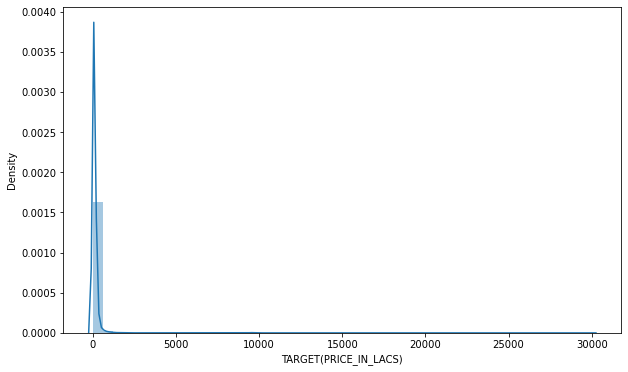

In [6]:
plt.figure(figsize=(10,6))
sns.distplot(train["TARGET(PRICE_IN_LACS)"], kde=True)
plt.show()

There are some of outliers in this dataset and it may actually make sense to drop those outliers in analysis if they are just a few points that are very extreme because may not be really useful to actually have the model train on those extreme outliers.

In [7]:
print(f"The Dataset size before removing outliers : {train.shape}")
max_val = train['TARGET(PRICE_IN_LACS)'].describe()['75%'] + 1.5 * (train['TARGET(PRICE_IN_LACS)'].describe()['75%'] - train['TARGET(PRICE_IN_LACS)'].describe()['25%'])
train = train[train['TARGET(PRICE_IN_LACS)'] < max_val]
print(f"The Dataset size after removing outliers : {train.shape}")

The Dataset size before removing outliers : (29451, 12)
The Dataset size after removing outliers : (26367, 12)


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


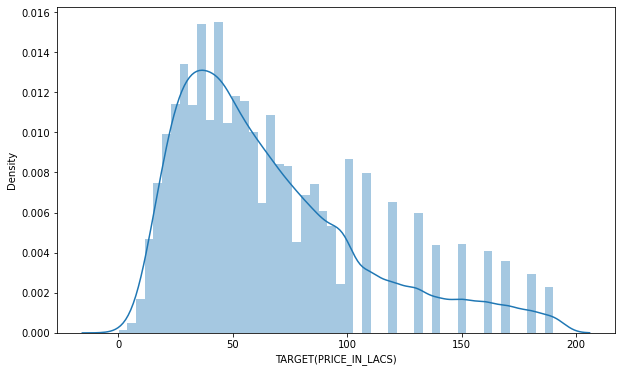

In [8]:
plt.figure(figsize=(10,6))
sns.distplot(train["TARGET(PRICE_IN_LACS)"], kde=True)
plt.show()

### 4. `POSTED_BY` feature

In [9]:
print(train["POSTED_BY"].value_counts(), end='\n\n')

Dealer     15413
Owner      10355
Builder      599
Name: POSTED_BY, dtype: int64



Since this feature values in string, all the values will be mapped into number.

In [10]:
dic = {}
for v, i in zip(train["POSTED_BY"].unique(), range(len(train["POSTED_BY"].unique()))):
    dic[v] = i

train["POSTED_BY"] = train["POSTED_BY"].map(dic)
test["POSTED_BY"] = test["POSTED_BY"].map(dic)

### 5. `BHK_OR_RK` feature

In [11]:
print(train["BHK_OR_RK"].value_counts(), end='\n\n')

BHK    26343
RK        24
Name: BHK_OR_RK, dtype: int64



This feature has a very high skewed values, there will be no impact if we drop this feature from the dataset.

In [12]:
train.drop(labels=["BHK_OR_RK"], axis=1, inplace=True)
test.drop(labels=["BHK_OR_RK"], axis=1, inplace=True)

### 6. The correlation between target and features

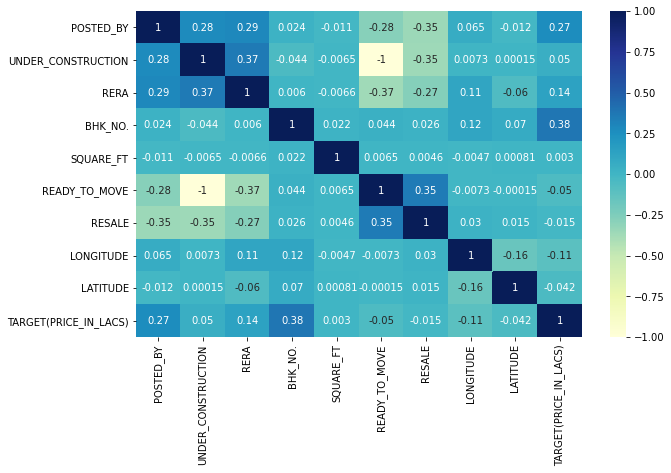

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(train.corr(), cmap="YlGnBu", annot=True)
plt.show()

`UNDER_CONSTRUCTION` feature has a perfect negative correlation with `READY_TO_MOVE` feature but their correlations with the target are very low!! `BHK_NO.` has the highest correlation with the target.

### 7. Analyze features that have high correlation with the target

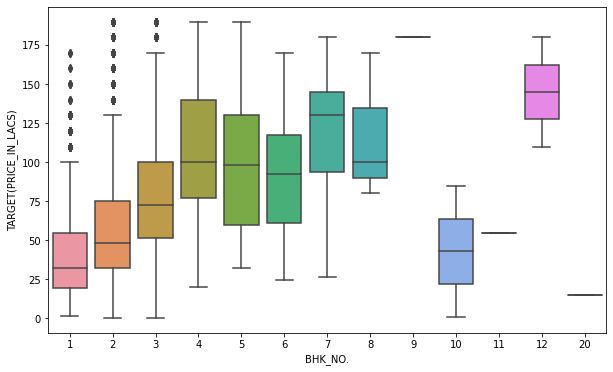

In [14]:
plt.figure(figsize=(10,6))
sns.boxplot(x="BHK_NO.", y="TARGET(PRICE_IN_LACS)", data=train)
plt.show()

In [15]:
print("House that has 9 rooms in dataset : ", len(train[train["BHK_NO."]==9]))
print("House that has 11 rooms in dataset : ", len(train[train["BHK_NO."]==11]))
print("House that has 20 rooms in dataset : ", len(train[train["BHK_NO."]==20]))

House that has 9 rooms in dataset :  1
House that has 11 rooms in dataset :  1
House that has 20 rooms in dataset :  1


Since there is only 1 observation for each room (9, 11, and 20), it'd be better to remove them rather than use them to train the model.

In [16]:
train = train[(train["BHK_NO."]!=9) & (train["BHK_NO."]!=11) & (train["BHK_NO."]!=20)]

### 8. Analyze features that have high correlations between them

Features with high correlation are more linearly dependent and hence have almost the same effect on the dependent variable. So, when two features have high correlation, we can drop one of the two features.

In [17]:
print(len(train[train["UNDER_CONSTRUCTION"]==0]))
print(len(train[train["UNDER_CONSTRUCTION"]==1]))
print(len(train[train["READY_TO_MOVE"]==0]))
print(len(train[train["READY_TO_MOVE"]==1]))

21649
4715
4715
21649


This really explains why both of those features are very high correlated, in short that if the house is under construction (value of 1) means `READY_TO_MOVE` will be 0 and vice versa.

In [18]:
train.drop(labels=["UNDER_CONSTRUCTION"], axis=1, inplace=True)
test.drop(labels=["UNDER_CONSTRUCTION"], axis=1, inplace=True)

### 9. Get the distribution of prices per geographical (latitude & longitude)

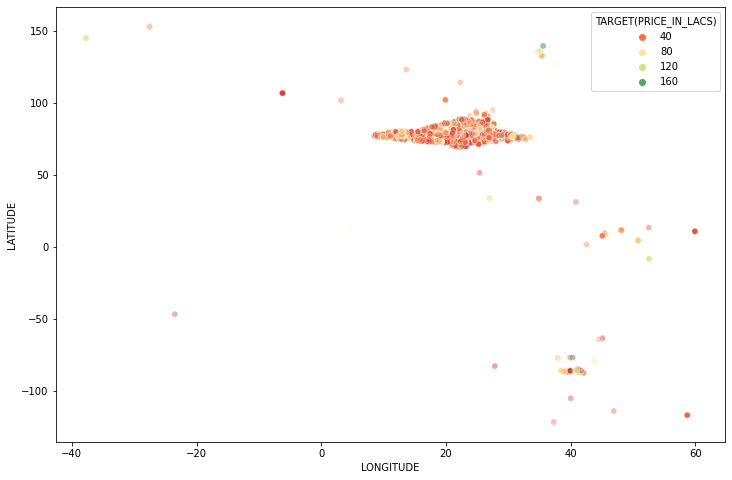

In [19]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='LONGITUDE', y='LATITUDE', hue='TARGET(PRICE_IN_LACS)', alpha=0.4, palette='RdYlGn', data=train)
plt.show()

### 10. `ADDRESS` feature

There are city information in this feature that maybe can give some information related to the price.

In [20]:
city = train['ADDRESS'].apply(lambda x : x.split(',')[1])
print(city.value_counts(), end='\n\n')
print("Total of unique values :", city.nunique())

Bangalore                     3851
Lalitpur                      2184
Pune                          1826
Noida                         1629
Kolkata                       1598
                              ... 
 Near Salua Bazar                1
Malappuram                       1
 near ram lila maidan            1
 Uttarahalli                     1
 Near Kasar Managal Bhavan       1
Name: ADDRESS, Length: 428, dtype: int64

Total of unique values : 428


There are 428 unique values in this feature and that won't be possible to do OneHot encoding with it. For now, this feature will be dropped. (FYI, this feature actually can be useful if we know how to group them based on province or maybe higher level. Since I'm not from India this task would be difficult because I don't know administrative area in India.)

In [21]:
train.drop(labels=["ADDRESS"], axis=1, inplace=True)
test.drop(labels=["ADDRESS"], axis=1, inplace=True)

---
# Feature Engineering

In [41]:
train.head()

,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),POSTED_BY_1,POSTED_BY_2
0,0,2,1300.236407,1,1,12.969910,77.597960,55.0,0,0
1,0,2,1275.000000,1,1,12.274538,76.644605,51.0,1,0
2,0,2,933.159722,1,1,12.778033,77.632191,43.0,0,0
3,1,2,929.921143,1,1,28.642300,77.344500,62.5,0,0
4,0,2,999.009247,0,1,22.592200,88.484911,60.5,1,0


### 1. OneHot encoding `POSTED_BY` feature

In [23]:
# train dataset
ohe = pd.get_dummies(train['POSTED_BY'], prefix="POSTED_BY", drop_first=True)
train.drop(labels=["POSTED_BY"], axis=1, inplace=True)
train = pd.concat([train, ohe], axis=1)

# test dataset
ohe = pd.get_dummies(test['POSTED_BY'], prefix="POSTED_BY", drop_first=True)
test.drop(labels=["POSTED_BY"], axis=1, inplace=True)
test = pd.concat([test, ohe], axis=1)

In [43]:
train

,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),POSTED_BY_1,POSTED_BY_2
0,0,2,1300.236407,1,1,12.969910,77.597960,55.0,0,0
1,0,2,1275.000000,1,1,12.274538,76.644605,51.0,1,0
2,0,2,933.159722,1,1,12.778033,77.632191,43.0,0,0
3,1,2,929.921143,1,1,28.642300,77.344500,62.5,0,0
4,0,2,999.009247,0,1,22.592200,88.484911,60.5,1,0
...,...,...,...,...,...,...,...,...,...,...
29446,0,3,2500.000000,1,1,27.140626,78.043277,45.0,0,0
29447,0,2,769.230769,1,1,39.945409,-86.150721,16.0,0,0
29448,0,2,1022.641509,1,1,26.928785,75.828002,27.1,1,0
29449,0,2,927.079009,1,1,12.900150,80.227910,67.0,0,0


---
# Splitting The Dataset into Train and Test

In [24]:
from sklearn.model_selection import train_test_split

x = train.drop('TARGET(PRICE_IN_LACS)', axis=1).values
y = train['TARGET(PRICE_IN_LACS)'].values

x_tr, x_ts, y_tr, y_ts = train_test_split(x, y, test_size=0.1, random_state=42)

In [45]:
x

array([[0.00000000e+00, 2.00000000e+00, 1.30023641e+03, ...,
        7.75979600e+01, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.00000000e+00, 1.27500000e+03, ...,
        7.66446050e+01, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.00000000e+00, 9.33159722e+02, ...,
        7.76321910e+01, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 2.00000000e+00, 1.02264151e+03, ...,
        7.58280020e+01, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.00000000e+00, 9.27079009e+02, ...,
        8.02279100e+01, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.00000000e+00, 8.96774194e+02, ...,
        7.58417490e+01, 1.00000000e+00, 0.00000000e+00]])

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(x_tr)
x_tr_scaled = scaler.transform(x_tr)
x_ts_scaled = scaler.transform(x_ts)

In [40]:
x_ts[1]

array([0.00000000e+00, 2.00000000e+00, 1.27635648e+03, 1.00000000e+00,
       1.00000000e+00, 2.83682690e+01, 7.73727300e+01, 1.00000000e+00,
       0.00000000e+00])

---
# Create The Model

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.losses import mae
from tensorflow.keras.callbacks import Callback, ModelCheckpoint
from tensorflow.keras.activations import linear, relu

class stopLearn(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('val_loss') < 21:
            print("\nStop training!!")
            self.model.stop_training=True

cb = stopLearn()
# checkpoint_name = 'models/Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
# cp = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
# callbacks_list = [cp, cb]

model = Sequential()
model.add(Dense(units=32, kernel_initializer='normal', input_dim=x_tr_scaled.shape[1], activation=relu))
model.add(Dense(units=64, activation=relu))
model.add(Dense(units=64, activation=relu))
model.add(Dense(units=128, activation=relu))
model.add(Dense(units=256, activation=relu))
model.add(Dense(units=1, activation=linear))

model.compile(optimizer=Adam(learning_rate=0.001), loss=mae)
# model.compile(optimizer=SGD(learning_rate=0.001), loss=mae)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_4 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 48,193
Trainable params: 48,193
Non-trainable params: 0
____________________________________________________

In [28]:
model.fit(x=x_tr_scaled, y=y_tr, validation_data=(x_ts_scaled, y_ts), batch_size=128, epochs=50, callbacks=[cb])

Epoch 1/50
186/186 [==============================] - 1s 3ms/step - loss: 22.1435 - val_loss: 21.4361
Epoch 2/50
186/186 [==============================] - 1s 3ms/step - loss: 22.0939 - val_loss: 22.7417
Epoch 3/50
186/186 [==============================] - 1s 4ms/step - loss: 22.1922 - val_loss: 21.6795
Epoch 4/50
186/186 [==============================] - 1s 3ms/step - loss: 22.0412 - val_loss: 23.6202
Epoch 5/50
186/186 [==============================] - 1s 3ms/step - loss: 22.3816 - val_loss: 21.7162
Epoch 6/50
186/186 [==============================] - 1s 3ms/step - loss: 22.0128 - val_loss: 21.4885
Epoch 7/50
186/186 [==============================] - 1s 3ms/step - loss: 22.0450 - val_loss: 21.4361
Epoch 8/50
186/186 [==============================] - 1s 3ms/step - loss: 22.0255 - val_loss: 22.7123
Epoch 9/50
186/186 [==============================] - 1s 3ms/step - loss: 22.0234 - val_loss: 21.7308
Epoch 10/50
186/186 [==============================] - 1s 3ms/step - loss: 22.0916

# Evaluate The Model

<Figure size 720x432 with 0 Axes>

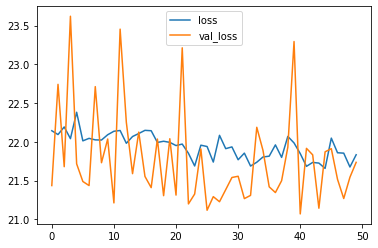

In [29]:
plt.figure(figsize=(10,6))
pd.DataFrame(model.history.history).plot()
plt.show()

In [30]:
y_pred = model.predict(x_ts_scaled).reshape(x_ts_scaled.shape[0],)
pred_df = pd.DataFrame({'Actual value':y_ts, 'Predicted value':y_pred})

print(pred_df.head())

from sklearn.metrics import mean_absolute_error

MAE_val = mean_absolute_error(y_true=pred_df['Actual value'], y_pred=pred_df['Predicted value'])
print("\nfrom the MAE result, on average the model about {:.2f} off from true price point in mean of actual values which is not really good and quite bad prediction because it off around 30% based on the mean of the target value.".format(MAE_val))

   Actual value  Predicted value
0         100.0        74.997444
1          45.4        43.083618
2          35.0        39.330780
3          97.0       140.185272
4         170.0        89.336884

from the MAE result, on average the model about 21.74 off from true price point in mean of actual values which is not really good and quite bad prediction because it off around 30% based on the mean of the target value.


In [31]:
'''
This score metric is for explain variance regression score function.
Best possible score is 1.0, lower values are worse.
'''
from sklearn.metrics import explained_variance_score

explained_variance_score(y_ts, y_pred)

0.43692896155856054